# Predicción de población de bebés por localidad en Toluca

## Descripción

Para cada AGEB del Municipio de Toluca, estima cuántos bebés de 0 a 6 meses de edad habitan ahí el día de hoy. Explica tu razonamiento en menos de 300 palabras.  
Enlista tus fuentes y presenta los resultados.

## Respuesta

In [31]:
 niños

,2000,2005,2010,2020
nom_loc,,,,
Barrio Santa Cruz,59,59,72,83
Cacalomacán,147,169,160,178
Calixtlahuaca,124,126,114,106
Jicaltepec Autopan,83,92,100,117
San Andrés Cuexcontitlán,250,289,336,421
San Antonio Buenavista,99,70,65,27
San Diego de los Padres Cuexcontitlán,51,64,156,248
San Felipe Tlalmimilolpan,109,125,126,146
San Juan Tilapa,130,116,123,112


## Razonamiento
INEGI nos da datos de tres años: 2000, 2005 y 2010<sup>1</sup>. Estos datos pueden ser limpiados para obtener la población de niños con diferentes rangos de edades. Junto con los datos de natalidad<sup>2</sup> se puede estimar la población de bebés de 0 a 6 meses. Posteriormente puede usarse el método de regresión lineal para predecir la población de 2020.

- 1 Censo de población y vivienda. Consultado en [https://www.inegi.org.mx/programas/ccpv/2010/default.html#Datos_abiertos](https://www.inegi.org.mx/programas/ccpv/2010/default.html#Datos_abiertos)
- 2 Natalidad y fecundidad. Consultado en [https://www.inegi.org.mx/temas/natalidad/](https://www.inegi.org.mx/temas/natalidad/)

In [1]:
import pandas as pd

Leemos todos los archivos como DataFrames

In [2]:
ageb_2010 = pd.read_csv("resultados_ageb_urbana_15_cpv2010.csv")
ageb_2005 = pd.read_csv("cpv2005_iter_15.csv")
ageb_2000 = pd.read_csv("cgpv2000_iter_15.csv")

Podemos revisar los datos en los DataFrames generados

In [3]:
ageb_2010.head()

,entidad,nom_ent,mun,nom_mun,loc,nom_loc,ageb,mza,pobtot,pobmas,...,vph_snbien,vph_radio,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter
0,15,México,0,Total de la entidad México,0,Total de la Entidad,0000,0,15175862,7396986,...,50484,3165441,3538214,2929118,2423942,1484392,1162156,1852506,2467712,811030
1,15,México,1,Acambay,0,Total del Municipio,0000,0,60918,29449,...,1132,10051,12011,6983,3528,3956,1180,2600,3920,496
2,15,México,1,Acambay,1,Total de la localidad urbana,0000,0,4077,1913,...,10,782,988,807,606,560,414,563,669,271
3,15,México,1,Acambay,1,Total AGEB urbana,0127,0,2648,1236,...,7,509,665,556,420,366,279,414,435,196
4,15,México,1,Acambay,1,Acambay,0127,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Como sólo trabajaremos con los datos de Toluca, podemos selecicionar las filas con "Toluca" como "nom_mun". (mun = municipio localidad según el Diccionario de datos)

In [4]:
t10 = ageb_2010[ageb_2010["nom_mun"]=="Toluca"]
t05 = ageb_2005[ageb_2005["nom_mun"]=="Toluca"]
t00 = ageb_2000[ageb_2000["nom_mun"]=="Toluca"]

In [5]:
t10.head()

,entidad,nom_ent,mun,nom_mun,loc,nom_loc,ageb,mza,pobtot,pobmas,...,vph_snbien,vph_radio,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter
93893,15,México,106,Toluca,0,Total del Municipio,0000,0,819561,394836,...,1754,170591,188423,150894,121061,98298,73856,94702,136187,53813
93894,15,México,106,Toluca,1,Total de la localidad urbana,0000,0,489333,232774,...,614,108479,118047,102108,84225,67714,56215,70672,91447,42308
93895,15,México,106,Toluca,1,Total AGEB urbana,0307,0,4550,2103,...,*,1129,1200,1158,972,796,718,884,1004,546
93896,15,México,106,Toluca,1,Toluca de Lerdo,0307,1,177,84,...,0,42,44,43,37,34,31,38,38,24
93897,15,México,106,Toluca,1,Toluca de Lerdo,0307,2,119,44,...,0,35,36,35,33,23,16,29,29,12


Las celdas con valores faltantes se llenaron con "\*", podemos eliminar estos valores de los conjuntos 

In [6]:
t10 = t10.drop(t10[t10["p_0a2"]=="*"].index, axis=0)
t05 = t05.drop(t05[t05["p_0a4_an"]=="*"].index, axis=0)
t00 = t00.drop(t00[t00["pob0_4"]=="*"].index, axis=0)

In [7]:
t10["p_0a2"] = t10["p_0a2"].astype(int)
t05["p_0a4"] = t05["p_0a4_an"].astype(int)
t00["pob0_4"] = t00["pob0_4"].astype(int)

Los datos deben agruparse por localidad para conocer la población infantil.

In [8]:
niños_t10 = t10.groupby("nom_loc")["p_0a2"].sum()
niños_t05 = t05.groupby("nom_loc")["p_0a4_an"].sum()
niños_t00 = t00.groupby("nom_loc")["pob0_4"].sum()

Podemos ahora ver la población infantil de Toluca en los diferentes censos.

In [9]:
niños_t00

nom_loc
ARENAL, EL                           22
ARROYO VISTA HERMOSA                225
BALBUENA (EL SIETE)                  64
BARRIO BORDO NUEVO                   91
BARRIO DE GUADALUPE TOTOLTEPEC      220
                                  ...  
TLACHALOYA PRIMERA SECCION          370
TLACHALOYA SEGUNDA SECCION          487
TOLUCA DE LERDO                   40152
TOTAL MUNICIPAL                   66927
VILLAS SANTIN                        48
Name: pob0_4, Length: 97, dtype: int32

Sin embargo, las series no pueden unirse por el método *merge* ya que los nombres tienen diferente formato, además de tener tamaños diferentes. Como se parte de la base de datos de 2010, usaremos las localidades registradas en ese conjunto. Las coincidencias con el resto, se encuentran en los índices contenidos en *rows*:

In [10]:
rows = [9, 11, 12, 15, 43, 44, 45, 28, 60, 61, 65, 66, 70, 71, 74, 76, 77, 79, 80, 82, 83, 84, 85, 87, 92, 93, 94]

niños_t00_a = pd.DataFrame(columns=["nom_loc", "pob0_4"])
a=0
for i in rows:
    niños_t00_a.loc[a,"nom_loc"] = niños_t00.index[i]
    niños_t00_a.loc[a, "pob0_4"] = niños_t00.iloc[i]
    a += 1

Podemos mostrar la el conjunto para averificar que los nombres coincidan:

In [32]:
niños_t00_a["r_name"] = niños_t10.index[0:27]
niños_t00_a

,pob0_4,r_name
nom_loc,,
Barrio Santa Cruz,380,Barrio Santa Cruz
Cacalomacán,953,Cacalomacán
Calixtlahuaca,799,Calixtlahuaca
El Cerrillo Vista Hermosa,660,El Cerrillo Vista Hermosa
Fraccionamiento Real de San Pablo,15,Fraccionamiento Real de San Pablo
Jicaltepec Autopan,538,Jicaltepec Autopan
Jicaltepec Cuexcontitlán,147,Jicaltepec Cuexcontitlán
La Constitución Toltepec,564,La Constitución Toltepec
San Andrés Cuexcontitlán,1619,San Andrés Cuexcontitlán


In [12]:
niños_t00_a = niños_t00_a.set_index("r_name")
niños_t00_a = niños_t00_a.drop("nom_loc", axis=1)
niños_t00_a.index = niños_t00_a.index.rename("nom_loc")
niños_t00_a

,pob0_4
nom_loc,
Barrio Santa Cruz,380
Cacalomacán,953
Calixtlahuaca,799
El Cerrillo Vista Hermosa,660
Fraccionamiento Real de San Pablo,15
Jicaltepec Autopan,538
Jicaltepec Cuexcontitlán,147
La Constitución Toltepec,564
San Andrés Cuexcontitlán,1619


Se combinan ahora los diferentes conjuntos:

In [13]:
niños = pd.merge(left=niños_t00_a, right=niños_t05, on="nom_loc")
niños = pd.merge(left=niños, right=niños_t10, on="nom_loc")
niños

,pob0_4,p_0a4_an,p_0a2
nom_loc,,,
Barrio Santa Cruz,380,383,270
Cacalomacán,953,1097,601
Calixtlahuaca,799,815,425
Jicaltepec Autopan,538,592,373
San Andrés Cuexcontitlán,1619,1874,1260
San Antonio Buenavista,639,452,242
San Diego de los Padres Cuexcontitlán,328,412,586
San Felipe Tlalmimilolpan,705,809,471
San Juan Tilapa,842,750,459


Sin embargo, esta no es la información pedida por el problema. Debe ser complementada con la tasa de natalidad.

In [14]:
niños["p_0a4_an"] = niños["p_0a4_an"].astype(int)

Los datos registrados de niños nacidos en los años 2000, 2005, y 2010 se muestran en la lista *nac_año*.

In [15]:
nac_año = [17925, 18565, 17989]

Si asumimos una misma tasa de nacimientos para todo el año la población de 0 a 6 meses de edad sería la mitad.

In [16]:
n_0a6 = [i/2 for i in nac_año]
n_0a6

[8962.5, 9282.5, 8994.5]

Podemos calcular las proporciones de los bebés en la población total de niños.

In [17]:
prop = []
for i in range(0,3):
    prop.append(n_0a6[i] / niños.iloc[:,i].sum())

prop

[0.15424396792069667, 0.15402548700759963, 0.265999290234814]

Las proporciones tienen sentido ya que en 2010 el grupo es de 0 a 2 años.

In [18]:
for i in range(0,3):
    niños.iloc[:,i] = niños.iloc[:,i] * prop[i]

In [19]:
import numpy as np

In [20]:
for i in niños.columns:
    niños[i] = niños[i].apply(np.ceil)
    niños[i] = niños[i].astype(int)

Unos ajustes y tenemos la tabla con los datos correctos:

In [21]:
niños = niños.rename(columns={"pob0_4": "2000", "p_0a4_an": "2005", "p_0a2":"2010"})
niños

,2000,2005,2010
nom_loc,,,
Barrio Santa Cruz,59,59,72
Cacalomacán,147,169,160
Calixtlahuaca,124,126,114
Jicaltepec Autopan,83,92,100
San Andrés Cuexcontitlán,250,289,336
San Antonio Buenavista,99,70,65
San Diego de los Padres Cuexcontitlán,51,64,156
San Felipe Tlalmimilolpan,109,125,126
San Juan Tilapa,130,116,123


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

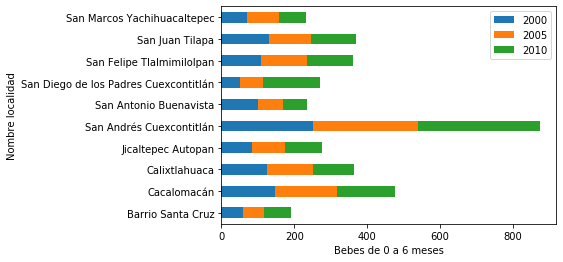

In [23]:
niños[0:10].plot.barh(stacked=True)
plt.ylabel("Nombre localidad")
plt.xlabel("Bebes de 0 a 6 meses")
plt.show()

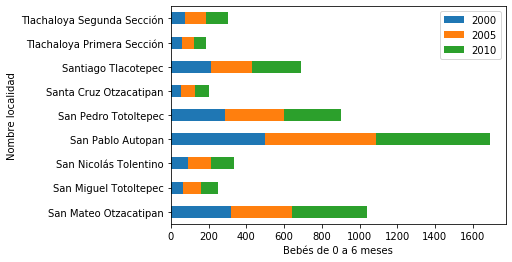

In [24]:
niños[10:19].plot.barh(stacked=True)
plt.ylabel("Nombre localidad")
plt.xlabel("Bebés de 0 a 6 meses")
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
pred = pd.DataFrame(columns=["2020"])

In [27]:
for i in range(0, niños.shape[0]):
    y = niños.iloc[i].to_numpy()
    x = np.array([2000, 2005, 2010])
    y = np.reshape(y,(-1,1))
    x = np.reshape(x,(-1,1))
    lr = LinearRegression()
    lr.fit(x,y)
    year = np.array([2020]).reshape(1,-1)
    p2020 = lr.predict(year)
    p2020 = int(np.round(p2020))
    pred.at[i,"2020"] = p2020

In [28]:
pred["2020"] = pred["2020"].astype(int)
pred.index = niños.index

In [29]:
niños = pd.merge(left=niños, right=pred, on="nom_loc")
niños

,2000,2005,2010,2020
nom_loc,,,,
Barrio Santa Cruz,59,59,72,83
Cacalomacán,147,169,160,178
Calixtlahuaca,124,126,114,106
Jicaltepec Autopan,83,92,100,117
San Andrés Cuexcontitlán,250,289,336,421
San Antonio Buenavista,99,70,65,27
San Diego de los Padres Cuexcontitlán,51,64,156,248
San Felipe Tlalmimilolpan,109,125,126,146
San Juan Tilapa,130,116,123,112


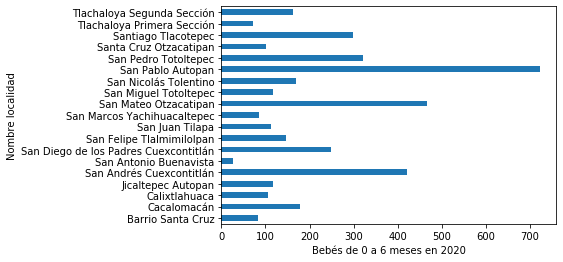

In [30]:
niños["2020"][0:19].plot.barh()
plt.ylabel("Nombre localidad")
plt.xlabel("Bebés de 0 a 6 meses en 2020")
plt.show()